## Activity 3 - Classifying Fashion
Fashion MNIST - An MNIST-like dataset of 70,000 28x28 labelled fashion images

In this activity, we will learn:<br>
* Fashion-MNIST Dataset 
* Load and preprocess the dataset
* Split the dataset for training and testing
* Define, compile and train a model
* Evaluate the model
* Tuning the model by changing the batch sizes and epoch


### Fashion-MNIST Dataset


Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

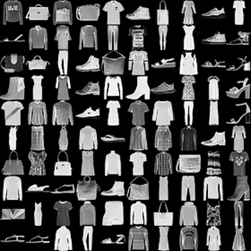

Like MNIST, Keras provides access to the Fashion MNIST dataset via the **fashion_mnist.load_data()** function. It returns two tuples, one with the input and output elements for the standard training dataset, and another with the input and output elements for the standard test dataset. The code snippet below loads the dataset and summarizes the shape of the loaded dataset.  The dataset will be downloaded if this is the first time you are using it.

### Import libraries and dataset

In [ ]:
from keras import models
from keras import layers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

# Load the MNIST data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('train_images shape:', train_images.shape)
print('test_images shape:', test_images.shape)
print('train_labels shape:', train_labels.shape)

4423680/4422102 [==============================] - 0s 0us/step
train_images shape: (60000, 28, 28)
test_images shape: (10000, 28, 28)
train_labels shape: (60000,)


Running the above loads the dataset and prints the shape of the input and output components of the train, test and train labels and test splits of images.

The images are grayscale with a black background (0 pixel value) and the handwritten digits in white (pixel values near 255).  The images are easier to review when we reverse the colours and plot the background as white and the handwritten digits in black. 

Label = 0


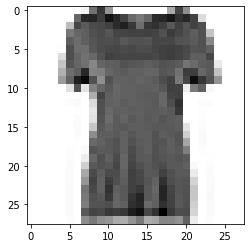

In [ ]:
#Display a sample
extract_digit = 10
digit = train_images[extract_digit]
label = train_labels[extract_digit]
print("Label =",label)
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Pre-process dataset


The next preprocessing task we need to perform is to flatten the 2D images into a 1D array.  Due to all the weights computation, we will need to normalise the pixel value by dividing them by 255.

We then use keras utility function to_categorical() function convert an array of labelled data(from 0 to 9) to one-hot vector. For an in-depth discussion on one-hot encoding, please refer to https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

Enter the following code in the next code block to <br>
(1) reshape the dataset into a 1D array, <br> (2) normalised the data to 0-1, and <br>(3) convert train and test label to categorical

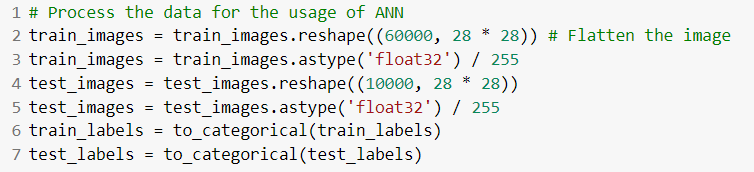

In [ ]:
#
# [ENTER YOUR CODE HERE]
#


### Create the network


Now we are ready to define our neural network.

In [ ]:
# Define the network
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Train the network



Enter the following code in the next code block to train the network with 50 epochs and 128 batch_size. 

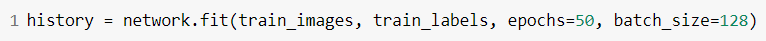

Note: The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned.  For an in-depth discussion on the history object, please refer to https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [ ]:
#
# [ENTER YOUR CODE]
#

Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 0.4897 - accuracy: 0.8252
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.4707 - accuracy: 0.8321
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.4555 - accuracy: 0.8391
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.4423 - accuracy: 0.8436
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.4266 - accuracy: 0.8484
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.4245 - accuracy: 0.8487
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 0.4146 - accuracy: 0.8543
Epoch 8/50
469/469 [==============================] - 1s 3ms/step - loss: 0.4118 - accuracy: 0.8540
Epoch 9/50
469/469 [==============================] - 1s 3ms/step - loss: 0.4031 - accuracy: 0.8583
Epoch 10/50
469/469 [==============================] - 1s 3ms/step - loss: 0.3910 - accuracy: 0.8616

### Evaluate the network

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels, verbose=2)
print('test_acc:', test_acc)
print("-----------------------------------")

313/313 - 1s - loss: 0.3508 - accuracy: 0.8751
test_acc: 0.8751000165939331
-----------------------------------


We see that although this network can classify MNIST data with high accuracy, but it did not classify more complex images like FASHION_MNIST as well.

Basic Neural Network has its limitation in classifying images. An image processing technique, Image Convolution, is required to understand an image better. We will learn about the Convolution Neural Network in the next lesson.


### Plot your training history

dict_keys(['loss', 'accuracy'])


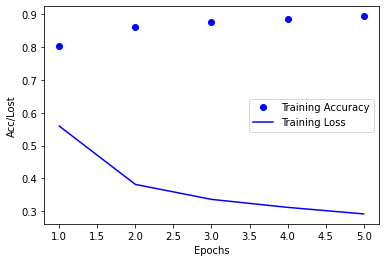

In [ ]:
# list all data in history
print(history.history.keys())

# Plot the Learning curve
import matplotlib.pyplot as plt
history_dict = history.history
acc_values = history_dict['accuracy']
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Acc/Lost')
plt.legend()
plt.show()

### Exercise


Add another hidden fully connected layer with 128 neurons and relu activation function to the neural network after the first hidden layer.  Retrain the network and evaluate the performance in the following code block.

In [ ]:
#
#[ENTER YOUR CODE HERE]
#